## Plots!

In [1]:
import stata_setup 
import pandas as pd
stata_setup.config("/Applications/STATA","se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 31 Aug 2024
Serial number: 401809300159
  Licensed to: Bruno Komel
               University of Pittsburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [2]:
%%stata

pwd


. 
. pwd
/Users/brunokomel/Documents/Pitt/Year 3/TA - Econ 3080/econ-3080-recitations/Re
> citation 0 - Intro to Stata

. 


In [3]:
%%stata

cd "~/Documents/Pitt/Year 3/TA - Econ 3080/econ-3080-recitations/Recitation 0 - Intro to Stata"



. 
. cd "~/Documents/Pitt/Year 3/TA - Econ 3080/econ-3080-recitations/Recitation 0
>  - Intro to Stata"
/Users/brunokomel/Documents/Pitt/Year 3/TA - Econ 3080/econ-3080-recitations/Re
> citation 0 - Intro to Stata

. 


In [19]:
%%stata 

import delimited "metrics_fall_2023_grades.csv"



. 
. import delimited "metrics_fall_2023_grades.csv"
(encoding automatically selected: UTF-8)
(2 vars, 1 obs)

. 


• $\textbf{Browse}$ ($\texttt{browse [varlist]}$): Opens data browser to view these variables

In [5]:
%%stata 

browse

SystemError: 
. 
. browse
command browse is unrecognized
r(199);
r(199);


In [20]:
%%stata -doutd df1 

In [21]:
display(df1)

,student,grade
0,Gotcha,100


In [23]:
%%stata 

import excel "metrics_fall_2023_grades.xlsx", clear


. 
. import excel "metrics_fall_2023_grades.xlsx", clear
(2 vars, 2 obs)

. 


In [24]:
%%stata

sysdir


. 
. sysdir
   STATA:  /Applications/STATA/
    BASE:  /Applications/STATA/ado/base/
    SITE:  /Applications/STATA/ado/site/
    PLUS:  /Users/brunokomel/Library/Application Support/Stata/ado/plus/
PERSONAL:  /Users/brunokomel/Documents/Stata/ado/personal/
OLDPLACE:  ~/ado/

. 


# Data Cleaning

In [142]:
%%stata -doutd df1

sysuse auto, clear


. 
. sysuse auto, clear
(1978 automobile data)

. 


In [143]:
display(df1)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.000000e+00,2.5,11,2930,186,40,121,3.58,0
1,AMC Pacer,4749,17,3.000000e+00,3.0,11,3350,173,40,258,2.53,0
2,AMC Spirit,3799,22,8.988466e+307,3.0,12,2640,168,35,121,3.08,0
3,Buick Century,4816,20,3.000000e+00,4.5,16,3250,196,40,196,2.93,0
4,Buick Electra,7827,15,4.000000e+00,4.0,20,4080,222,43,350,2.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.000000e+00,2.5,12,2160,172,36,97,3.74,1
70,VW Diesel,5397,41,5.000000e+00,3.0,15,2040,155,35,90,3.78,1
71,VW Rabbit,4697,25,4.000000e+00,3.0,15,1930,155,35,89,3.78,1
72,VW Scirocco,6850,25,4.000000e+00,2.0,16,1990,156,36,97,3.78,1


In [144]:
%%stata

bysort rep78: sum price mpg headroom if foreign == 0


. 
. bysort rep78: sum price mpg headroom if foreign == 0

-------------------------------------------------------------------------------
-> rep78 = 1

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |          2      4564.5    522.5519       4195       4934
         mpg |          2          21    4.242641         18         24
    headroom |          2        1.75    .3535534        1.5          2

-------------------------------------------------------------------------------
-> rep78 = 2

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |          8    5967.625    3579.357       3667      14500
         mpg |          8      19.125    3.758324         14         24
    headroom |          8       3.375    1.217433          2          5

------------------------------

In [145]:
%%stata 

sum price mpg headroom if foreign == 0 & rep78 == 1 

sum price mpg headroom if foreign == 0 & rep78 == 2


. 
. sum price mpg headroom if foreign == 0 & rep78 == 1 

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |          2      4564.5    522.5519       4195       4934
         mpg |          2          21    4.242641         18         24
    headroom |          2        1.75    .3535534        1.5          2

. 
. sum price mpg headroom if foreign == 0 & rep78 == 2

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |          8    5967.625    3579.357       3667      14500
         mpg |          8      19.125    3.758324         14         24
    headroom |          8       3.375    1.217433          2          5

. 


$\textbf{Order}$ $(\texttt{order [varlist]}$): Relocates columns in data browser $\\$
$\textbf{Sort}$ $(\texttt{sort [varlist]}$): Sorts row by values (e.g. highest to lowest
wages)

In [146]:
%%stata -doutd df1

UsageError: %%stata is a cell magic, but the cell body is empty. Did you mean the line magic %stata (single %)?


In [147]:
%%stata -doutd df2

order make mpg price

sort mpg


. 
. order make mpg price

. 
. sort mpg

. 


In [148]:
display(df1)


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.000000e+00,2.5,11,2930,186,40,121,3.58,0
1,AMC Pacer,4749,17,3.000000e+00,3.0,11,3350,173,40,258,2.53,0
2,AMC Spirit,3799,22,8.988466e+307,3.0,12,2640,168,35,121,3.08,0
3,Buick Century,4816,20,3.000000e+00,4.5,16,3250,196,40,196,2.93,0
4,Buick Electra,7827,15,4.000000e+00,4.0,20,4080,222,43,350,2.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.000000e+00,2.5,12,2160,172,36,97,3.74,1
70,VW Diesel,5397,41,5.000000e+00,3.0,15,2040,155,35,90,3.78,1
71,VW Rabbit,4697,25,4.000000e+00,3.0,15,1930,155,35,89,3.78,1
72,VW Scirocco,6850,25,4.000000e+00,2.0,16,1990,156,36,97,3.78,1


In [149]:
display(df2)

,make,mpg,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,Linc. Continental,12,11497,3.0,3.5,22,4840,233,51,400,2.47,0
1,Linc. Mark V,12,13594,3.0,2.5,18,4720,230,48,400,2.47,0
2,Merc. Cougar,14,5379,4.0,3.5,16,4060,221,48,302,2.75,0
3,Linc. Versailles,14,13466,3.0,3.5,15,3830,201,41,302,2.47,0
4,Cad. Deville,14,11385,3.0,4.0,20,4330,221,44,425,2.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,Toyota Corolla,31,3748,5.0,3.0,9,2200,165,35,97,3.21,1
70,Plym. Champ,34,4425,5.0,2.5,11,1800,157,37,86,2.97,0
71,Datsun 210,35,4589,5.0,2.0,8,2020,165,32,85,3.70,1
72,Subaru,35,3798,5.0,2.5,11,2050,164,36,97,3.81,1


$\textbf{Tag duplicates}$ ($\texttt{duplicates tag [varlist]}$): Generates variable representing number of duplicates for particular value (e.g. ID numbers)

In [150]:
%%stata -doutd df2 

duplicates tag mpg , gen(dup_mpg)


. 
. duplicates tag mpg , gen(dup_mpg)

Duplicates in terms of mpg

. 


In [151]:
display(df2)

,make,mpg,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,dup_mpg
0,Linc. Continental,12,11497,3.0,3.5,22,4840,233,51,400,2.47,0,1
1,Linc. Mark V,12,13594,3.0,2.5,18,4720,230,48,400,2.47,0,1
2,Merc. Cougar,14,5379,4.0,3.5,16,4060,221,48,302,2.75,0,5
3,Linc. Versailles,14,13466,3.0,3.5,15,3830,201,41,302,2.47,0,5
4,Cad. Deville,14,11385,3.0,4.0,20,4330,221,44,425,2.28,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Toyota Corolla,31,3748,5.0,3.0,9,2200,165,35,97,3.21,1,0
70,Plym. Champ,34,4425,5.0,2.5,11,1800,157,37,86,2.97,0,0
71,Datsun 210,35,4589,5.0,2.0,8,2020,165,32,85,3.70,1,1
72,Subaru,35,3798,5.0,2.5,11,2050,164,36,97,3.81,1,1


In [152]:
%%stata

gen price_per_pound = price / weight
replace price_per_pound = 1 if mpg > 15 | foreign != 1


. 
. gen price_per_pound = price / weight

. replace price_per_pound = 1 if mpg > 15 | foreign != 1
(73 real changes made)

. 


In [153]:
%%stata

sum weight

return list


. 
. sum weight

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      weight |         74    3019.459    777.1936       1760       4840

. 
. return list

scalars:
                  r(N) =  74
              r(sum_w) =  74
               r(mean) =  3019.45945945946
                r(Var) =  604029.8407997037
                 r(sd) =  777.1935671373662
                r(min) =  1760
                r(max) =  4840
                r(sum) =  223440

. 


In [154]:
%%stata -doutd df2 

quietly sum weight  // quietly (or, equivalently, qui) suppresses the output

local avg_weight = r(mean)

gen heavy = 0
replace heavy = 1 if weight >= `avg_weight'


. 
. quietly sum weight  // quietly (or, equivalently, qui) suppresses the output

. 
. local avg_weight = r(mean)

. 
. gen heavy = 0

. replace heavy = 1 if weight >= `avg_weight'
(39 real changes made)

. 


In [155]:
display(df2)

,make,mpg,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,dup_mpg,price_per_pound,heavy
0,Linc. Continental,12,11497,3.0,3.5,22,4840,233,51,400,2.47,0,1,1.0,1.0
1,Linc. Mark V,12,13594,3.0,2.5,18,4720,230,48,400,2.47,0,1,1.0,1.0
2,Merc. Cougar,14,5379,4.0,3.5,16,4060,221,48,302,2.75,0,5,1.0,1.0
3,Linc. Versailles,14,13466,3.0,3.5,15,3830,201,41,302,2.47,0,5,1.0,1.0
4,Cad. Deville,14,11385,3.0,4.0,20,4330,221,44,425,2.28,0,5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Toyota Corolla,31,3748,5.0,3.0,9,2200,165,35,97,3.21,1,0,1.0,0.0
70,Plym. Champ,34,4425,5.0,2.5,11,1800,157,37,86,2.97,0,0,1.0,0.0
71,Datsun 210,35,4589,5.0,2.0,8,2020,165,32,85,3.70,1,1,1.0,0.0
72,Subaru,35,3798,5.0,2.5,11,2050,164,36,97,3.81,1,1,1.0,0.0


In [156]:
%%stata

sum heavy

sum dup_mpg


. 
. sum heavy

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       heavy |         74     .527027     .502677          0          1

. 
. sum dup_mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     dup_mpg |         74    3.864865    2.389041          0          8

. 


In [157]:
%%stata  -doutd df2

label define wgt_cat 1 "Heavy" 0 "Light"
label values heavy wgt_cat


. 
. label define wgt_cat 1 "Heavy" 0 "Light"

. label values heavy wgt_cat

. 


In [158]:
display(df2)

,make,mpg,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,dup_mpg,price_per_pound,heavy
0,Linc. Continental,12,11497,3.0,3.5,22,4840,233,51,400,2.47,0,1,1.0,1.0
1,Linc. Mark V,12,13594,3.0,2.5,18,4720,230,48,400,2.47,0,1,1.0,1.0
2,Merc. Cougar,14,5379,4.0,3.5,16,4060,221,48,302,2.75,0,5,1.0,1.0
3,Linc. Versailles,14,13466,3.0,3.5,15,3830,201,41,302,2.47,0,5,1.0,1.0
4,Cad. Deville,14,11385,3.0,4.0,20,4330,221,44,425,2.28,0,5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Toyota Corolla,31,3748,5.0,3.0,9,2200,165,35,97,3.21,1,0,1.0,0.0
70,Plym. Champ,34,4425,5.0,2.5,11,1800,157,37,86,2.97,0,0,1.0,0.0
71,Datsun 210,35,4589,5.0,2.0,8,2020,165,32,85,3.70,1,1,1.0,0.0
72,Subaru,35,3798,5.0,2.5,11,2050,164,36,97,3.81,1,1,1.0,0.0


# Data Inspection

In [159]:
%%stata

sum price mpg


. 
. sum price mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41

. 


In [160]:
%%stata

tab foreign


. 
. tab foreign

 Car origin |      Freq.     Percent        Cum.
------------+-----------------------------------
   Domestic |         52       70.27       70.27
    Foreign |         22       29.73      100.00
------------+-----------------------------------
      Total |         74      100.00

. 


In [161]:
%%stata

tab foreign heavy


. 
. tab foreign heavy

           |         heavy
Car origin |     Light      Heavy |     Total
-----------+----------------------+----------
  Domestic |        15         37 |        52 
   Foreign |        20          2 |        22 
-----------+----------------------+----------
     Total |        35         39 |        74 

. 


In [162]:
%%stata 

pwcorr foreign heavy



. 
. pwcorr foreign heavy

             |  foreign    heavy
-------------+------------------
     foreign |   1.0000 
       heavy |  -0.5682   1.0000 

. 


# Hypothesis Testing

In [170]:
%%stata

ttest weight, by(foreign)

return list
power twomeans `r(mu_1)' `r(mu_2)', sd(`r(sd_1)')


. 
. ttest weight, by(foreign)

Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. err.   Std. dev.   [95% conf. interval]
---------+--------------------------------------------------------------------
Domestic |      52    3317.115     96.4296    695.3637    3123.525    3510.706
 Foreign |      22    2315.909    92.31665    433.0035    2123.926    2507.892
---------+--------------------------------------------------------------------
Combined |      74    3019.459    90.34692    777.1936    2839.398    3199.521
---------+--------------------------------------------------------------------
    diff |            1001.206    160.2876                681.6788    1320.734
------------------------------------------------------------------------------
    diff = mean(Domestic) - mean(Foreign)                         t =   6.2463
H0: diff = 0                                     Degrees of


Performing iteration ...

Estimated sample sizes for a two-sample means test
t test assuming sd1 = sd2 = sd
H0: m2 = m1  versus  Ha: m2 != m1

Study parameters:

        alpha =    0.0500
        power =    0.8000
        delta = -1.00e+03
           m1 = 3317.1154
           m2 = 2315.9091
           sd =  695.3637

Estimated sample sizes:

            N =        18
  N per group =         9

. 


In [171]:
%%stata

ttest mpg == weight


. 
. ttest mpg == weight

Paired t test
------------------------------------------------------------------------------
Variable |     Obs        Mean    Std. err.   Std. dev.   [95% conf. interval]
---------+--------------------------------------------------------------------
     mpg |      74     21.2973    .6725511    5.785503     19.9569    22.63769
  weight |      74    3019.459    90.34692    777.1936    2839.398    3199.521
---------+--------------------------------------------------------------------
    diff |      74   -2998.162    90.89065    781.8709   -3179.307   -2817.017
------------------------------------------------------------------------------
     mean(diff) = mean(mpg - weight)                              t = -32.9865
 H0: mean(diff) = 0                              Degrees of freedom =       73

 Ha: mean(diff) < 0           Ha: mean(diff) != 0           Ha: mean(diff) > 0
 Pr(T < t) = 0.0000         Pr(|T| > |t|) = 0.0000          Pr(T > t) = 1.0000

. 


# Regression

In [173]:
%%stata

reg price weight rep78 foreign


. 
. reg price weight rep78 foreign

      Source |       SS           df       MS      Number of obs   =        69
-------------+----------------------------------   F(3, 65)        =     21.34
       Model |   286198394         3  95399464.8   Prob > F        =    0.0000
    Residual |   290598565        65  4470747.15   R-squared       =    0.4962
-------------+----------------------------------   Adj R-squared   =    0.4729
       Total |   576796959        68  8482308.22   Root MSE        =    2114.4



------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   3.388606   .4238388     8.00   0.000     2.542141     4.23507
       rep78 |   150.5706   321.5908     0.47   0.641    -491.6905    792.8318
     foreign |   3444.848   824.5214     4.18   0.000     1798.165    5091.531
       _cons |  -5689.552   1776.277    -3.20   0.002    -9237.021   -2142.083
------------------------------------------------------------------------------

. 


In [174]:
%%stata

vif  // testing Multicolinearity (Some sources say VIF >=5 is too high, others say that 10 is an appropriate cut-off)


. 
. vif  // testing Multicolinearity (Some sources say VIF >=5 is too high, other
> s say that 10 is an appropriate cut-off)

    Variable |       VIF       1/VIF  
-------------+----------------------
     foreign |      2.22    0.450158
      weight |      1.72    0.582218
       rep78 |      1.54    0.648714
-------------+----------------------
    Mean VIF |      1.83

. 


In [179]:
%%stata

reg price weight rep78#foreign //partial interaction (only includes interaction terms)


reg price weight rep78##foreign  // full interaction, includes interaction as well as individual terms


. 
. reg price weight rep78#foreign
note: 1b.rep78#1.foreign identifies no observations in the sample.
note: 2.rep78#1.foreign identifies no observations in the sample.

      Source |       SS           df       MS      Number of obs   =        69
-------------+----------------------------------   F(8, 60)        =      9.05
       Model |   315359465         8  39419933.1   Prob > F        =    0.0000
    Residual |   261437494        60  4357291.57   R-squared       =    0.5467
-------------+----------------------------------   Adj R-squared   =    0.4863
       Total |   576796959        68  8482308.22   Root MSE        =    2087.4

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   3.811384   .4666457     8.17   0.000     2.877954    4.744815
             |
       rep78#|
     for

In [181]:
%%stata

estat hettest //low p-value suggests presence of heteroskedasticity


. 
. estat hettest //low p-value suggests presence of heteroskedasticity

Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of price

H0: Constant variance

    chi2(1) =   2.33
Prob > chi2 = 0.1267

. 


In [186]:
%%stata -doutd df2

gen sample_reg = e(sample) //constructs dummy variable equal to 1 if obs included in regression


. 
. gen sample_reg = e(sample) //constructs dummy variable equal to 1 if obs incl
> uded in regression

. 


In [187]:
display(df2)

,make,mpg,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,dup_mpg,price_per_pound,heavy,sample_reg
0,Linc. Continental,12,11497,3.0,3.5,22,4840,233,51,400,2.47,0,1,1.0,1.0,1.0
1,Linc. Mark V,12,13594,3.0,2.5,18,4720,230,48,400,2.47,0,1,1.0,1.0,1.0
2,Merc. Cougar,14,5379,4.0,3.5,16,4060,221,48,302,2.75,0,5,1.0,1.0,1.0
3,Linc. Versailles,14,13466,3.0,3.5,15,3830,201,41,302,2.47,0,5,1.0,1.0,1.0
4,Cad. Deville,14,11385,3.0,4.0,20,4330,221,44,425,2.28,0,5,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Toyota Corolla,31,3748,5.0,3.0,9,2200,165,35,97,3.21,1,0,1.0,0.0,1.0
70,Plym. Champ,34,4425,5.0,2.5,11,1800,157,37,86,2.97,0,0,1.0,0.0,1.0
71,Datsun 210,35,4589,5.0,2.0,8,2020,165,32,85,3.70,1,1,1.0,0.0,1.0
72,Subaru,35,3798,5.0,2.5,11,2050,164,36,97,3.81,1,1,1.0,0.0,1.0


# Loops 

In [188]:
%%stata
foreach v of varlist weight rep78 foreign{
    reg price `v'
}


. foreach v of varlist weight rep78 foreign{
  2.     reg price `v'
  3. }

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(1, 72)        =     29.42
       Model |   184233937         1   184233937   Prob > F        =    0.0000
    Residual |   450831459        72  6261548.04   R-squared       =    0.2901
-------------+----------------------------------   Adj R-squared   =    0.2802
       Total |   635065396        73  8699525.97   Root MSE        =    2502.3

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   2.044063   .3768341     5.42   0.000     1.292857    2.795268
       _cons |  -6.707353    1174.43    -0.01   0.995     -2347.89    2334.475
-----------------------------------------------------

In [190]:
%%stata 

forvalues i = 1/5{
    reg price weight foreign if rep78 == `i'
}


. 
. forvalues i = 1/5{
  2.     reg price weight foreign if rep78 == `i'
  3. }
note: foreign omitted because of collinearity.

      Source |       SS           df       MS      Number of obs   =         2
-------------+----------------------------------   F(1, 0)         =         .
       Model |    273060.5         1    273060.5   Prob > F        =         .
    Residual |           0         0           .   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =         .
       Total |    273060.5         1    273060.5   Root MSE        =         0

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   .9986486          .        .       .            .           .
     foreign |          0  (omitted)
       _cons |   1468.689          .      

In [191]:
%%stata

local i = 1 

while `i' <= 5{
    reg price weight foreign if rep78 == `i'
    local i = `i' + 1
}


. 
. local i = 1 

. 
. while `i' <= 5{
  2.     reg price weight foreign if rep78 == `i'
  3.     local i = `i' + 1
  4. }
note: foreign omitted because of collinearity.

      Source |       SS           df       MS      Number of obs   =         2
-------------+----------------------------------   F(1, 0)         =         .
       Model |    273060.5         1    273060.5   Prob > F        =         .
    Residual |           0         0           .   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =         .
       Total |    273060.5         1    273060.5   Root MSE        =         0

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   .9986486          .        .       .            .           .
     foreign |          0  (omitted)

In [192]:
%%stata

levelsof rep78, local(levels)

foreach i of local levels{
    reg price weight foreign if rep78 == `i'
}


. 
. levelsof rep78, local(levels)
1 2 3 4 5

. 
. foreach i of local levels{
  2.     reg price weight foreign if rep78 == `i'
  3. }
note: foreign omitted because of collinearity.

      Source |       SS           df       MS      Number of obs   =         2
-------------+----------------------------------   F(1, 0)         =         .
       Model |    273060.5         1    273060.5   Prob > F        =         .
    Residual |           0         0           .   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =         .
       Total |    273060.5         1    273060.5   Root MSE        =         0

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   .9986486          .        .       .            .           .
     foreign |          0

## Postestimation Results Retrieval (Important)

In [193]:
%%stata

reg price weight foreign


. 
. reg price weight foreign

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     35.35
       Model |   316859273         2   158429637   Prob > F        =    0.0000
    Residual |   318206123        71  4481776.38   R-squared       =    0.4989
-------------+----------------------------------   Adj R-squared   =    0.4848
       Total |   635065396        73  8699525.97   Root MSE        =      2117

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   3.320737   .3958784     8.39   0.000     2.531378    4.110096
     foreign |   3637.001    668.583     5.44   0.000     2303.885    4970.118
       _cons |  -4942.844   1345.591    -3.67   0.000    -7625.876   -2259.812
-------------------

In [194]:
%%stata

ereturn list


. 
. ereturn list

scalars:
                  e(N) =  74
               e(df_m) =  2
               e(df_r) =  71
                  e(F) =  35.34974155116983
                 e(r2) =  .4989395977632349
               e(rmse) =  2117.02063708647
                e(mss) =  316859273.2942713
                e(rss) =  318206122.8273503
               e(r2_a) =  .4848252202354387
                 e(ll) =  -670.144809891525
               e(ll_0) =  -695.7128688987767
               e(rank) =  3

macros:
            e(cmdline) : "regress price weight foreign"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "ols"
             e(depvar) : "price"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"

matrices:
                  e(b) :  1 x 3
                  e(V) :  3 x 3
               e(beta) :  1 x 2

functions:


In [197]:
%%stata

matrix list e(b)


. 
. matrix list e(b)

e(b)[1,3]
       weight    foreign      _cons
y1  3.3207368  3637.0013  -4942.844

. 


In [198]:
%%stata

disp e(b)[1,1]


. 
. disp e(b)[1,1]
3.3207368

. 


# Other Stuff

In [199]:
%%stata

preserve


. 
. preserve

. 


In [200]:
%%stata -doutd df3

collapse (mean) price weight foreign (median) m_price = price, by(rep78)


. 
. collapse (mean) price weight foreign (median) m_price = price, by(rep78)

. 


In [201]:
display(df3)

,rep78,price,weight,foreign,m_price
0,1.000000e+00,4564.500000,3100.000000,0.000000,4564.5
1,2.000000e+00,5967.625000,3353.750000,0.000000,4638.0
2,3.000000e+00,6429.233398,3299.000000,0.100000,4741.0
3,4.000000e+00,6071.500000,2870.000000,0.500000,5751.5
4,5.000000e+00,5913.000000,2322.727295,0.818182,5397.0
5,8.988466e+307,6430.399902,2846.000000,0.200000,4453.0


In [202]:
%%stata -doutd df3 

restore


. 
. restore

. 


In [203]:
display(df3)

,make,mpg,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,dup_mpg,price_per_pound,heavy,sample_reg
0,Linc. Continental,12,11497,3.0,3.5,22,4840,233,51,400,2.47,0,1,1.0,1.0,1.0
1,Linc. Mark V,12,13594,3.0,2.5,18,4720,230,48,400,2.47,0,1,1.0,1.0,1.0
2,Merc. Cougar,14,5379,4.0,3.5,16,4060,221,48,302,2.75,0,5,1.0,1.0,1.0
3,Linc. Versailles,14,13466,3.0,3.5,15,3830,201,41,302,2.47,0,5,1.0,1.0,1.0
4,Cad. Deville,14,11385,3.0,4.0,20,4330,221,44,425,2.28,0,5,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Toyota Corolla,31,3748,5.0,3.0,9,2200,165,35,97,3.21,1,0,1.0,0.0,1.0
70,Plym. Champ,34,4425,5.0,2.5,11,1800,157,37,86,2.97,0,0,1.0,0.0,1.0
71,Datsun 210,35,4589,5.0,2.0,8,2020,165,32,85,3.70,1,1,1.0,0.0,1.0
72,Subaru,35,3798,5.0,2.5,11,2050,164,36,97,3.81,1,1,1.0,0.0,1.0


# Common Errors

In [204]:
%%stata

unique make


. 
. unique make
Number of unique values of make is  74
Number of records is  74

. 


In [206]:
%%stata

gen make_new = make + 2

SystemError: 
. 
. gen make_new = make + 2
type mismatch
r(109);
r(109);


In [208]:
%%stata

gen newvar = .

reg price newvar weight

SystemError: 
. 
. gen newvar = .
(74 missing values generated)

. 
. reg price newvar weight
no observations
r(2000);
r(2000);


# What about plots?

In [209]:
display(df2)

,make,mpg,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,dup_mpg,price_per_pound,heavy,sample_reg
0,Linc. Continental,12,11497,3.0,3.5,22,4840,233,51,400,2.47,0,1,1.0,1.0,1.0
1,Linc. Mark V,12,13594,3.0,2.5,18,4720,230,48,400,2.47,0,1,1.0,1.0,1.0
2,Merc. Cougar,14,5379,4.0,3.5,16,4060,221,48,302,2.75,0,5,1.0,1.0,1.0
3,Linc. Versailles,14,13466,3.0,3.5,15,3830,201,41,302,2.47,0,5,1.0,1.0,1.0
4,Cad. Deville,14,11385,3.0,4.0,20,4330,221,44,425,2.28,0,5,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Toyota Corolla,31,3748,5.0,3.0,9,2200,165,35,97,3.21,1,0,1.0,0.0,1.0
70,Plym. Champ,34,4425,5.0,2.5,11,1800,157,37,86,2.97,0,0,1.0,0.0,1.0
71,Datsun 210,35,4589,5.0,2.0,8,2020,165,32,85,3.70,1,1,1.0,0.0,1.0
72,Subaru,35,3798,5.0,2.5,11,2050,164,36,97,3.81,1,1,1.0,0.0,1.0


In [210]:
%%stata 

set scheme s2color


. 
. set scheme s2color

. 



. 
. graph twoway scatter weight length

. graph save wl, replace
file wl.gph saved

. 


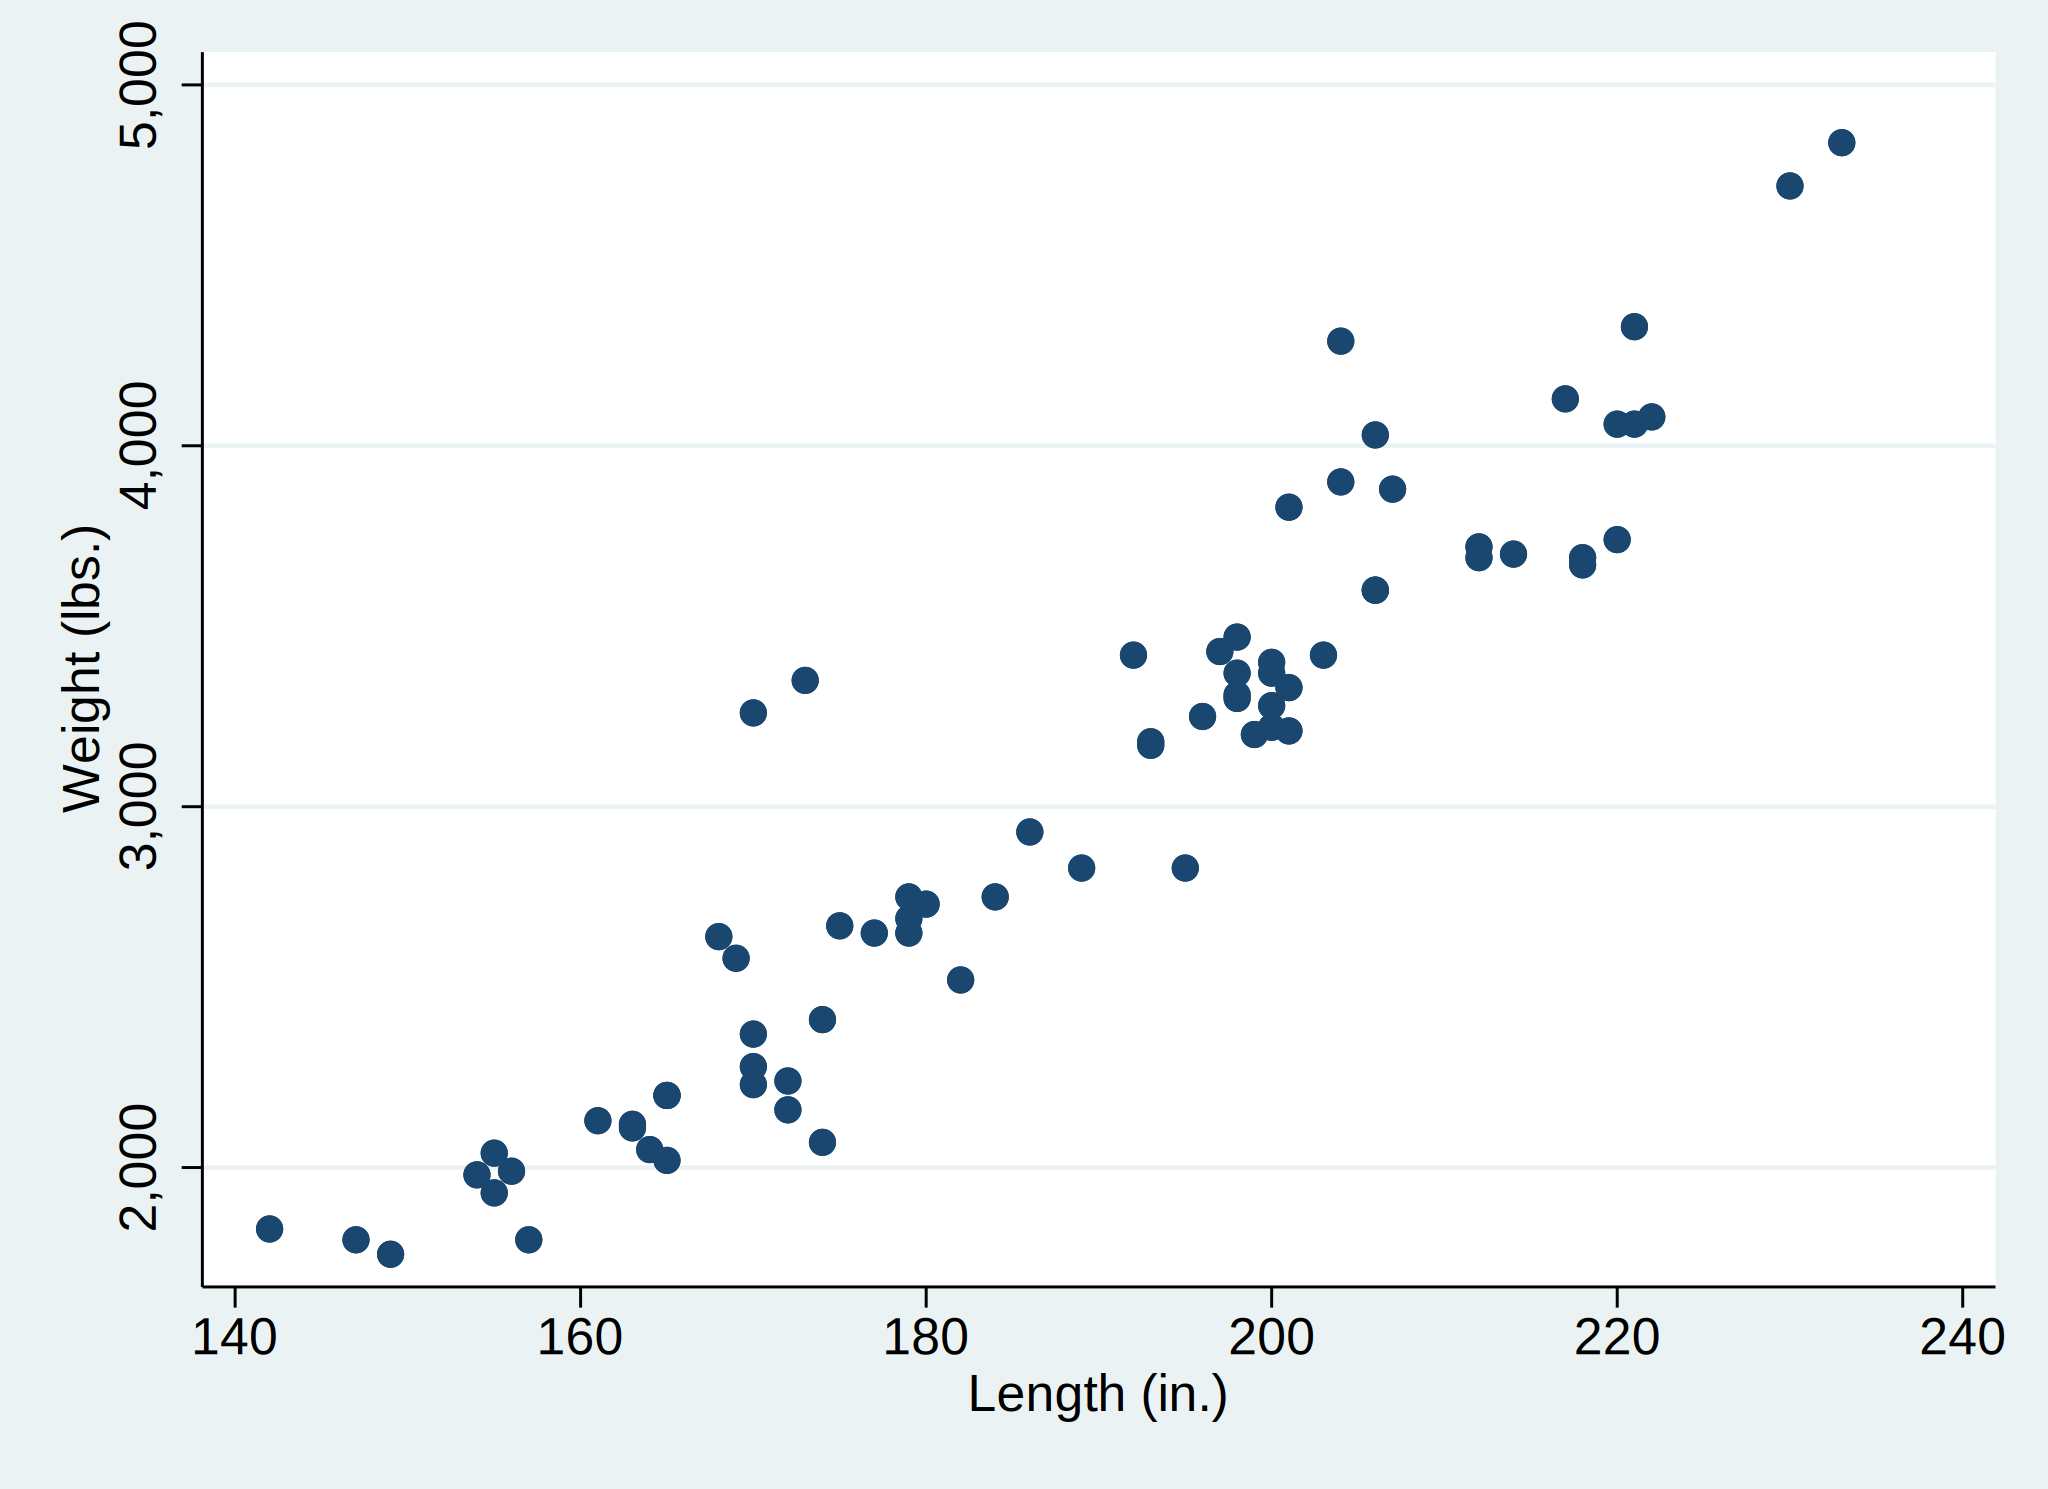

In [211]:
%%stata

graph twoway scatter weight length
graph save wl, replace


. 
. set scheme gg_tableau

. 
. graph twoway scatter weight length

. graph save wl, replace
file wl.gph saved

. 


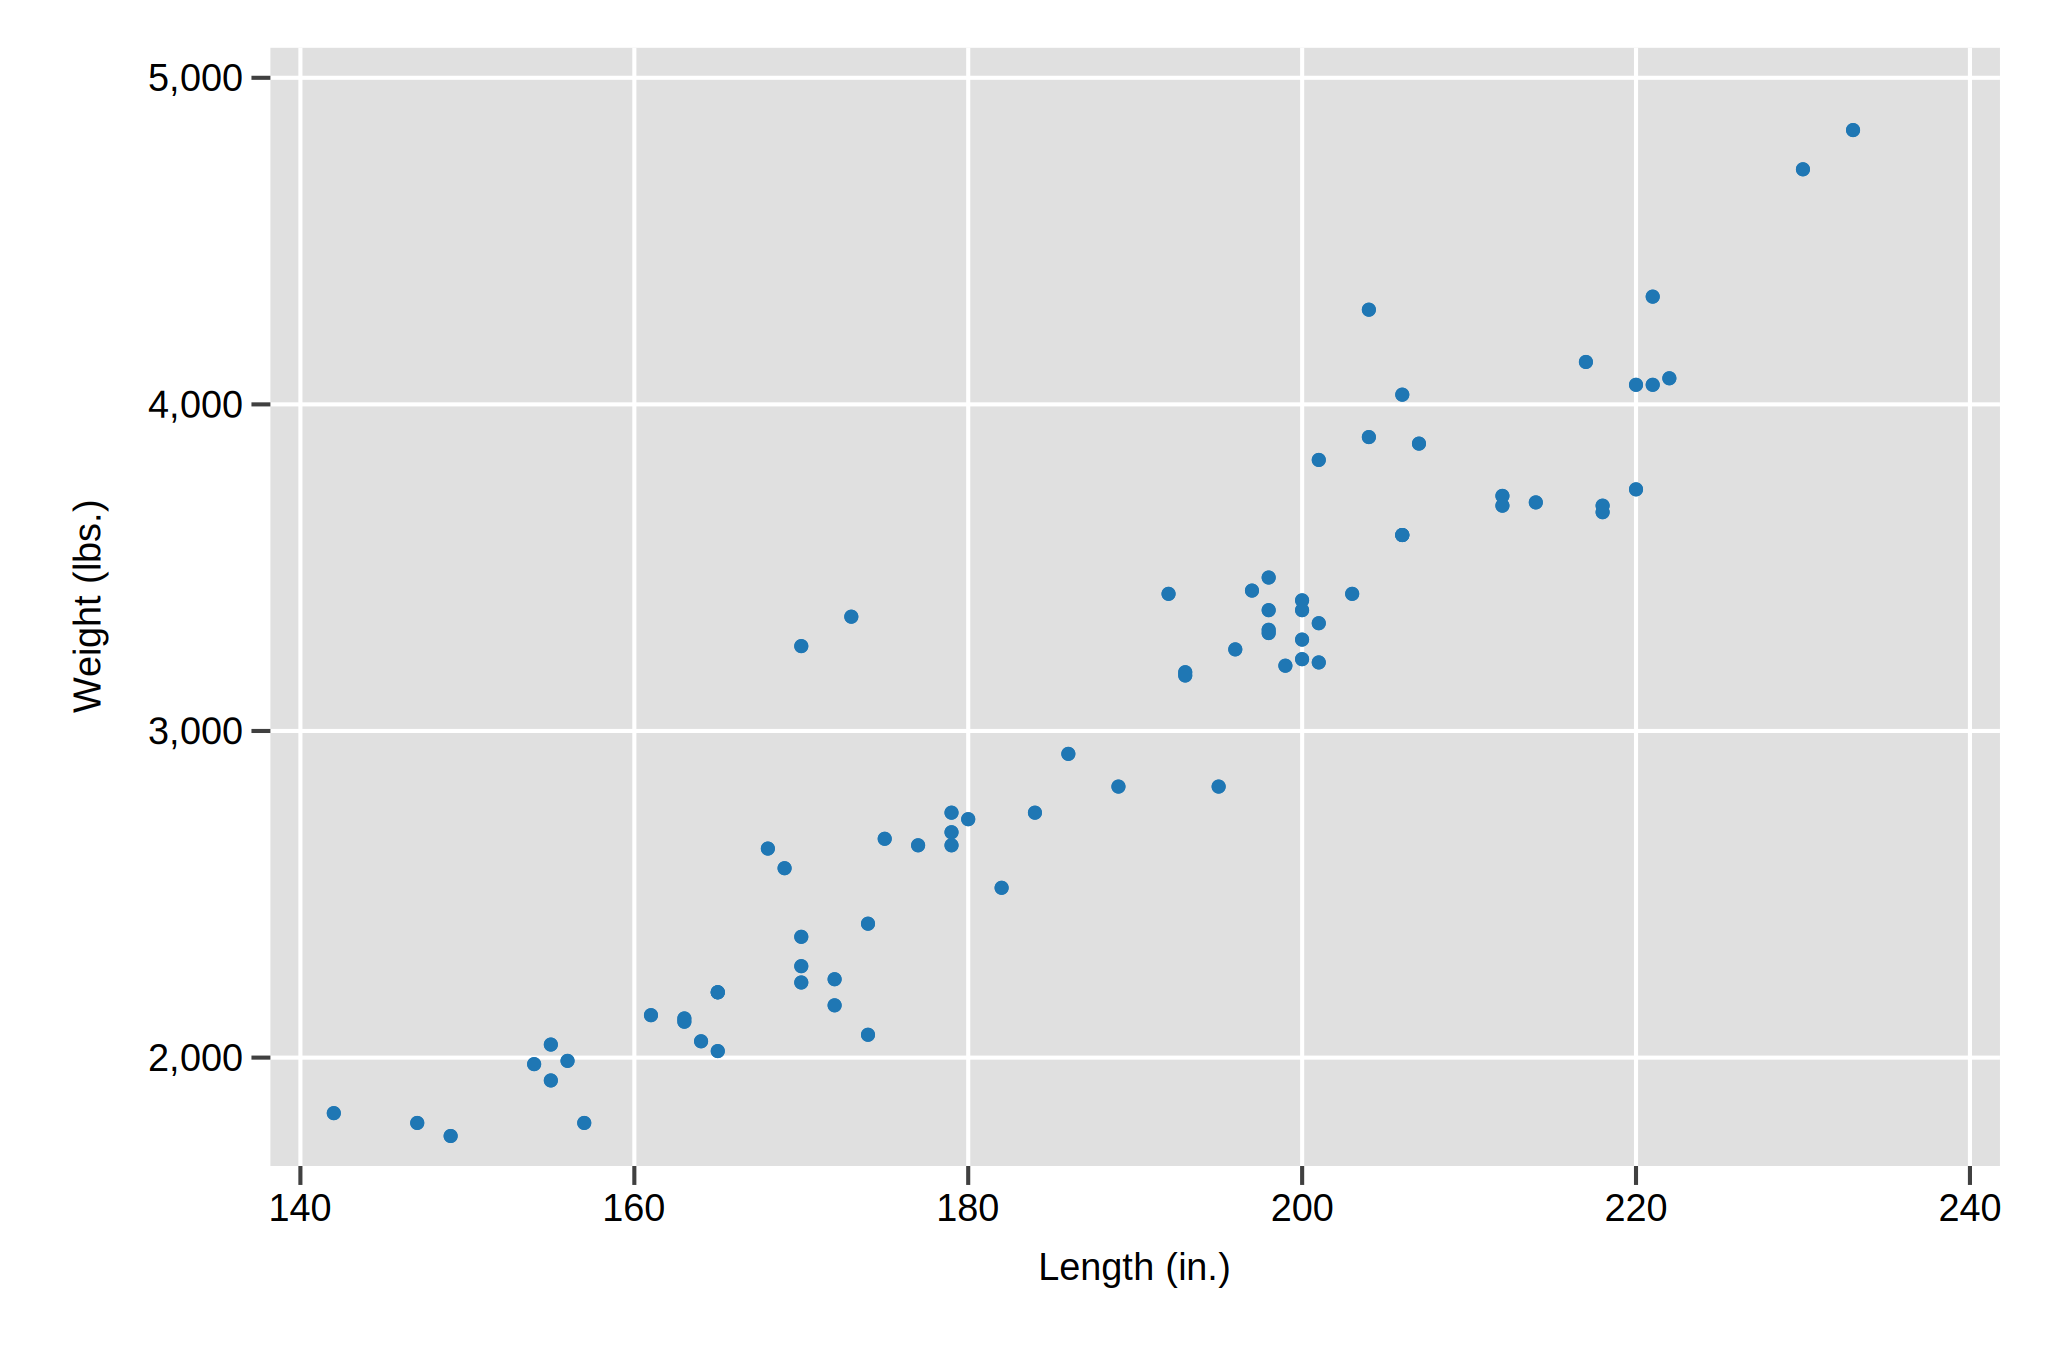

In [212]:
%%stata

set scheme gg_tableau

graph twoway scatter weight length
graph save wl, replace


. 
. graph twoway scatter price mpg

. graph save pm, replace
file pm.gph saved

. 


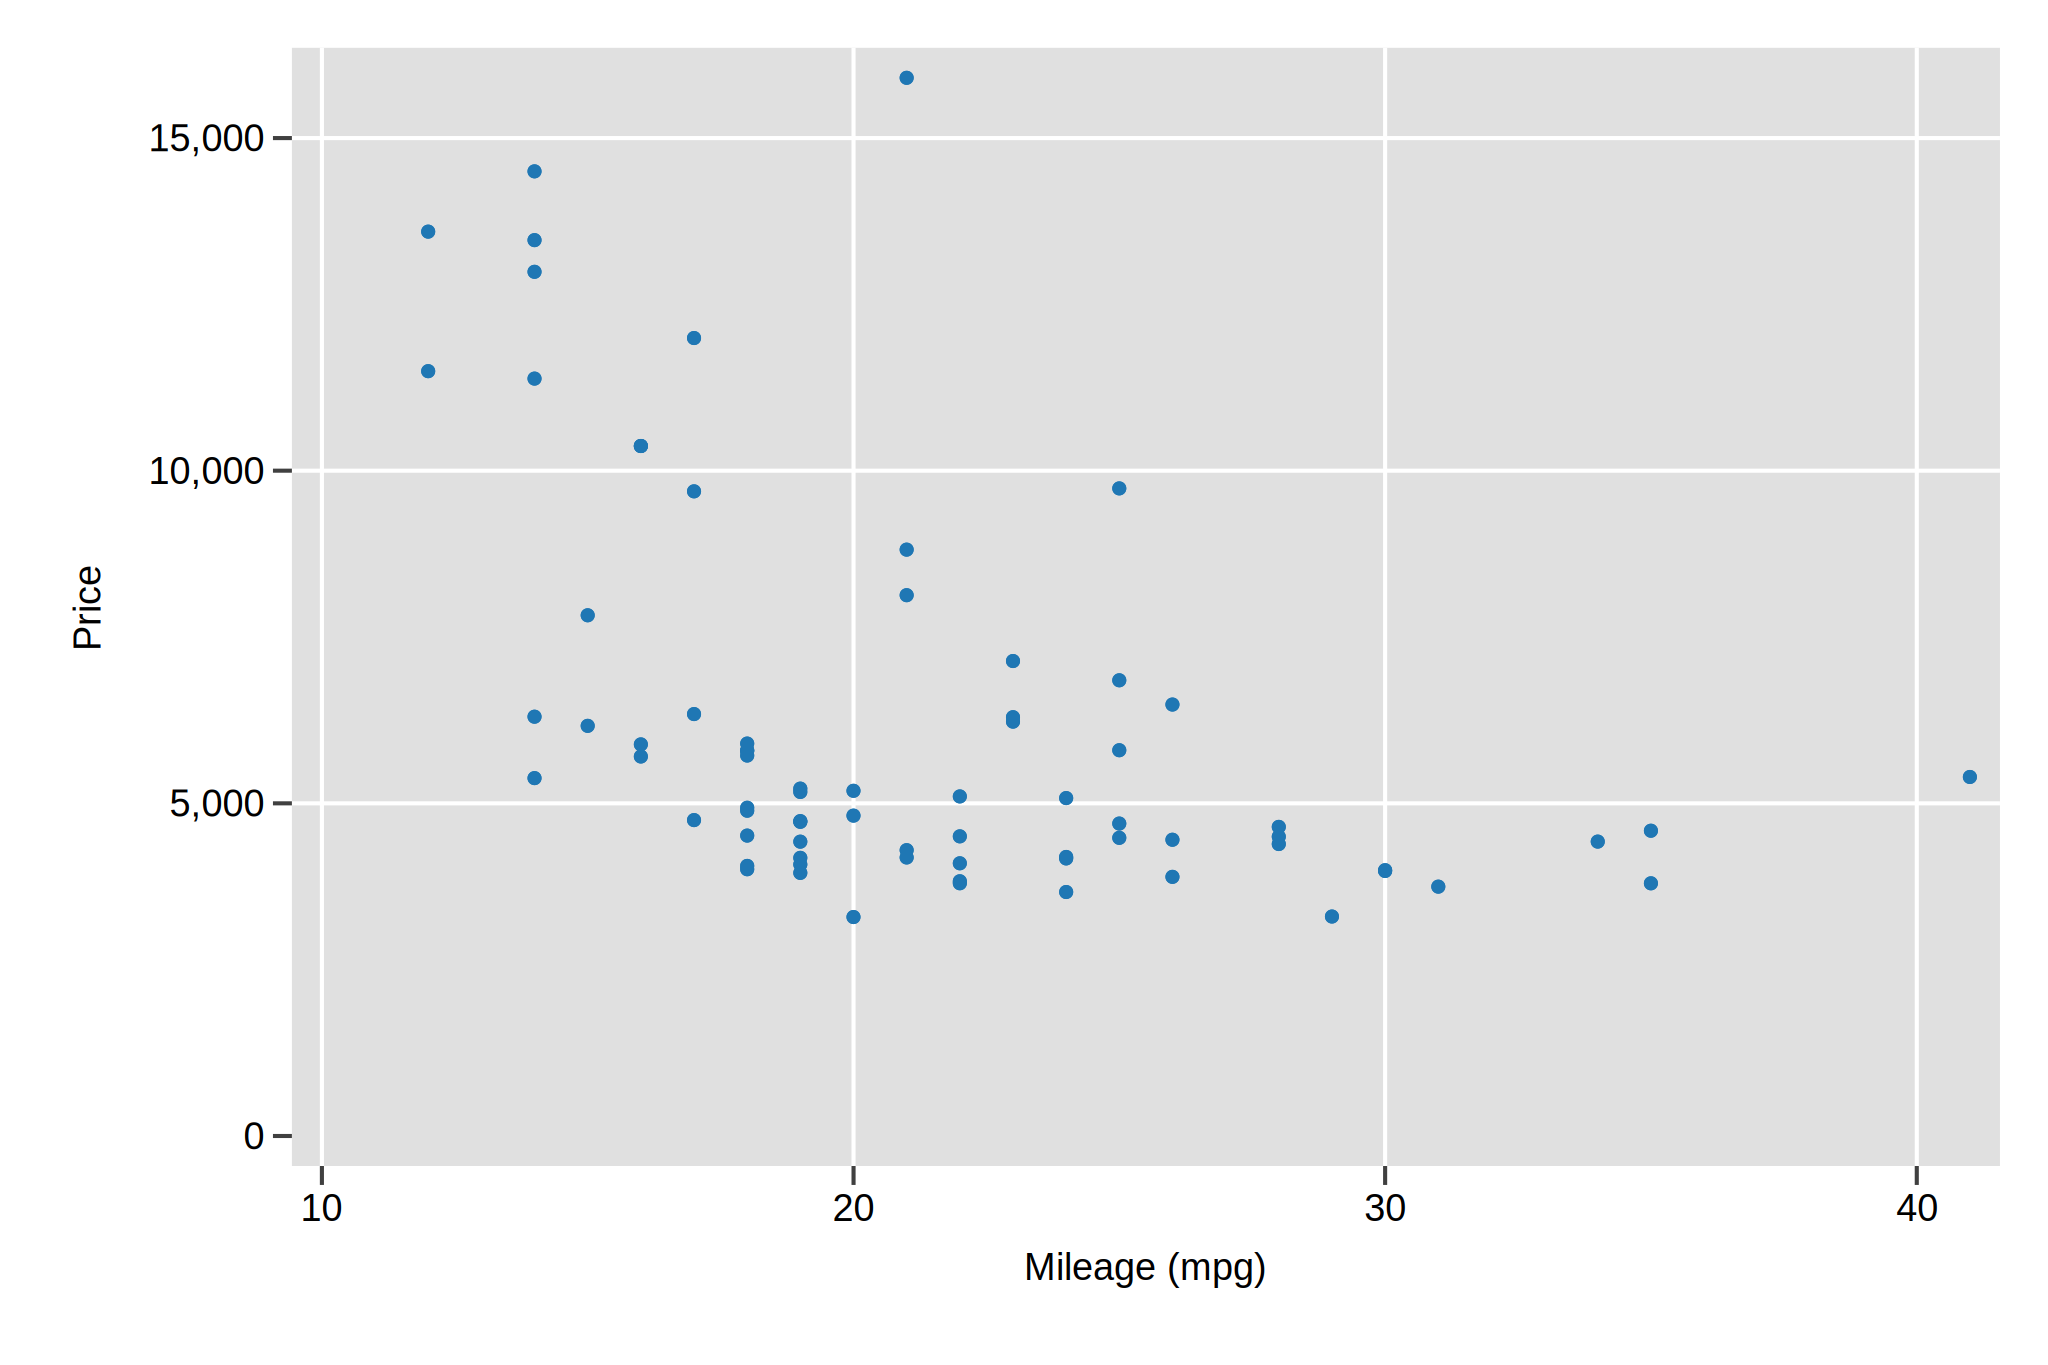

In [213]:
%%stata

graph twoway scatter price mpg
graph save pm, replace

In [214]:
%%stata

set scheme white_tableau


. 
. set scheme white_tableau

. 



. 
. graph combine wl.gph pm.gph

. 


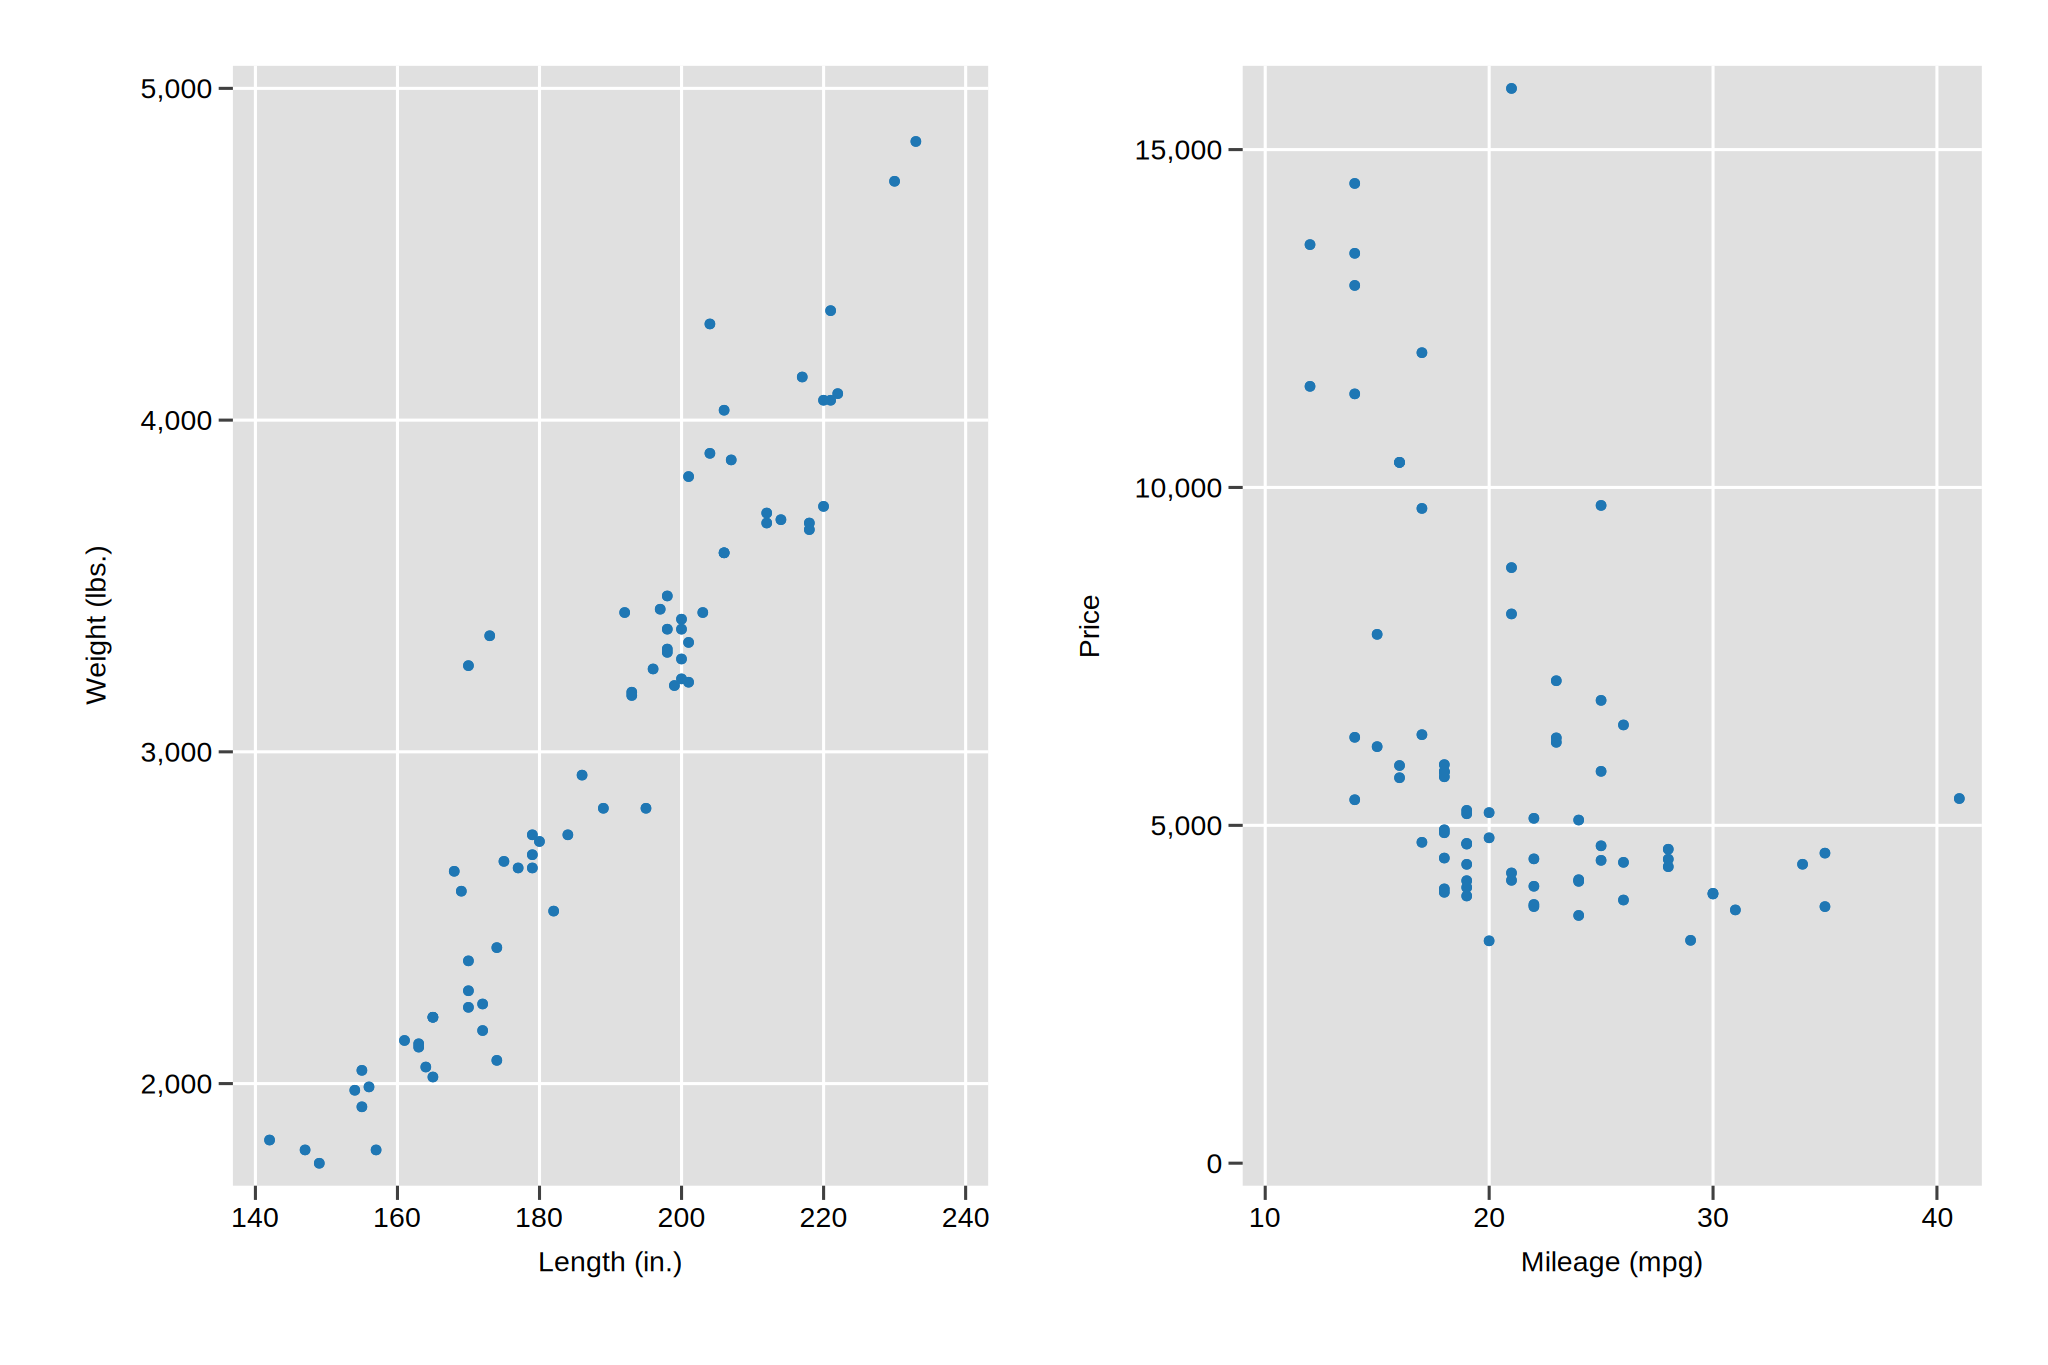

In [215]:
%%stata

graph combine wl.gph pm.gph


. 
. graph twoway (scatter price mpg) (lfit price mpg)

. 


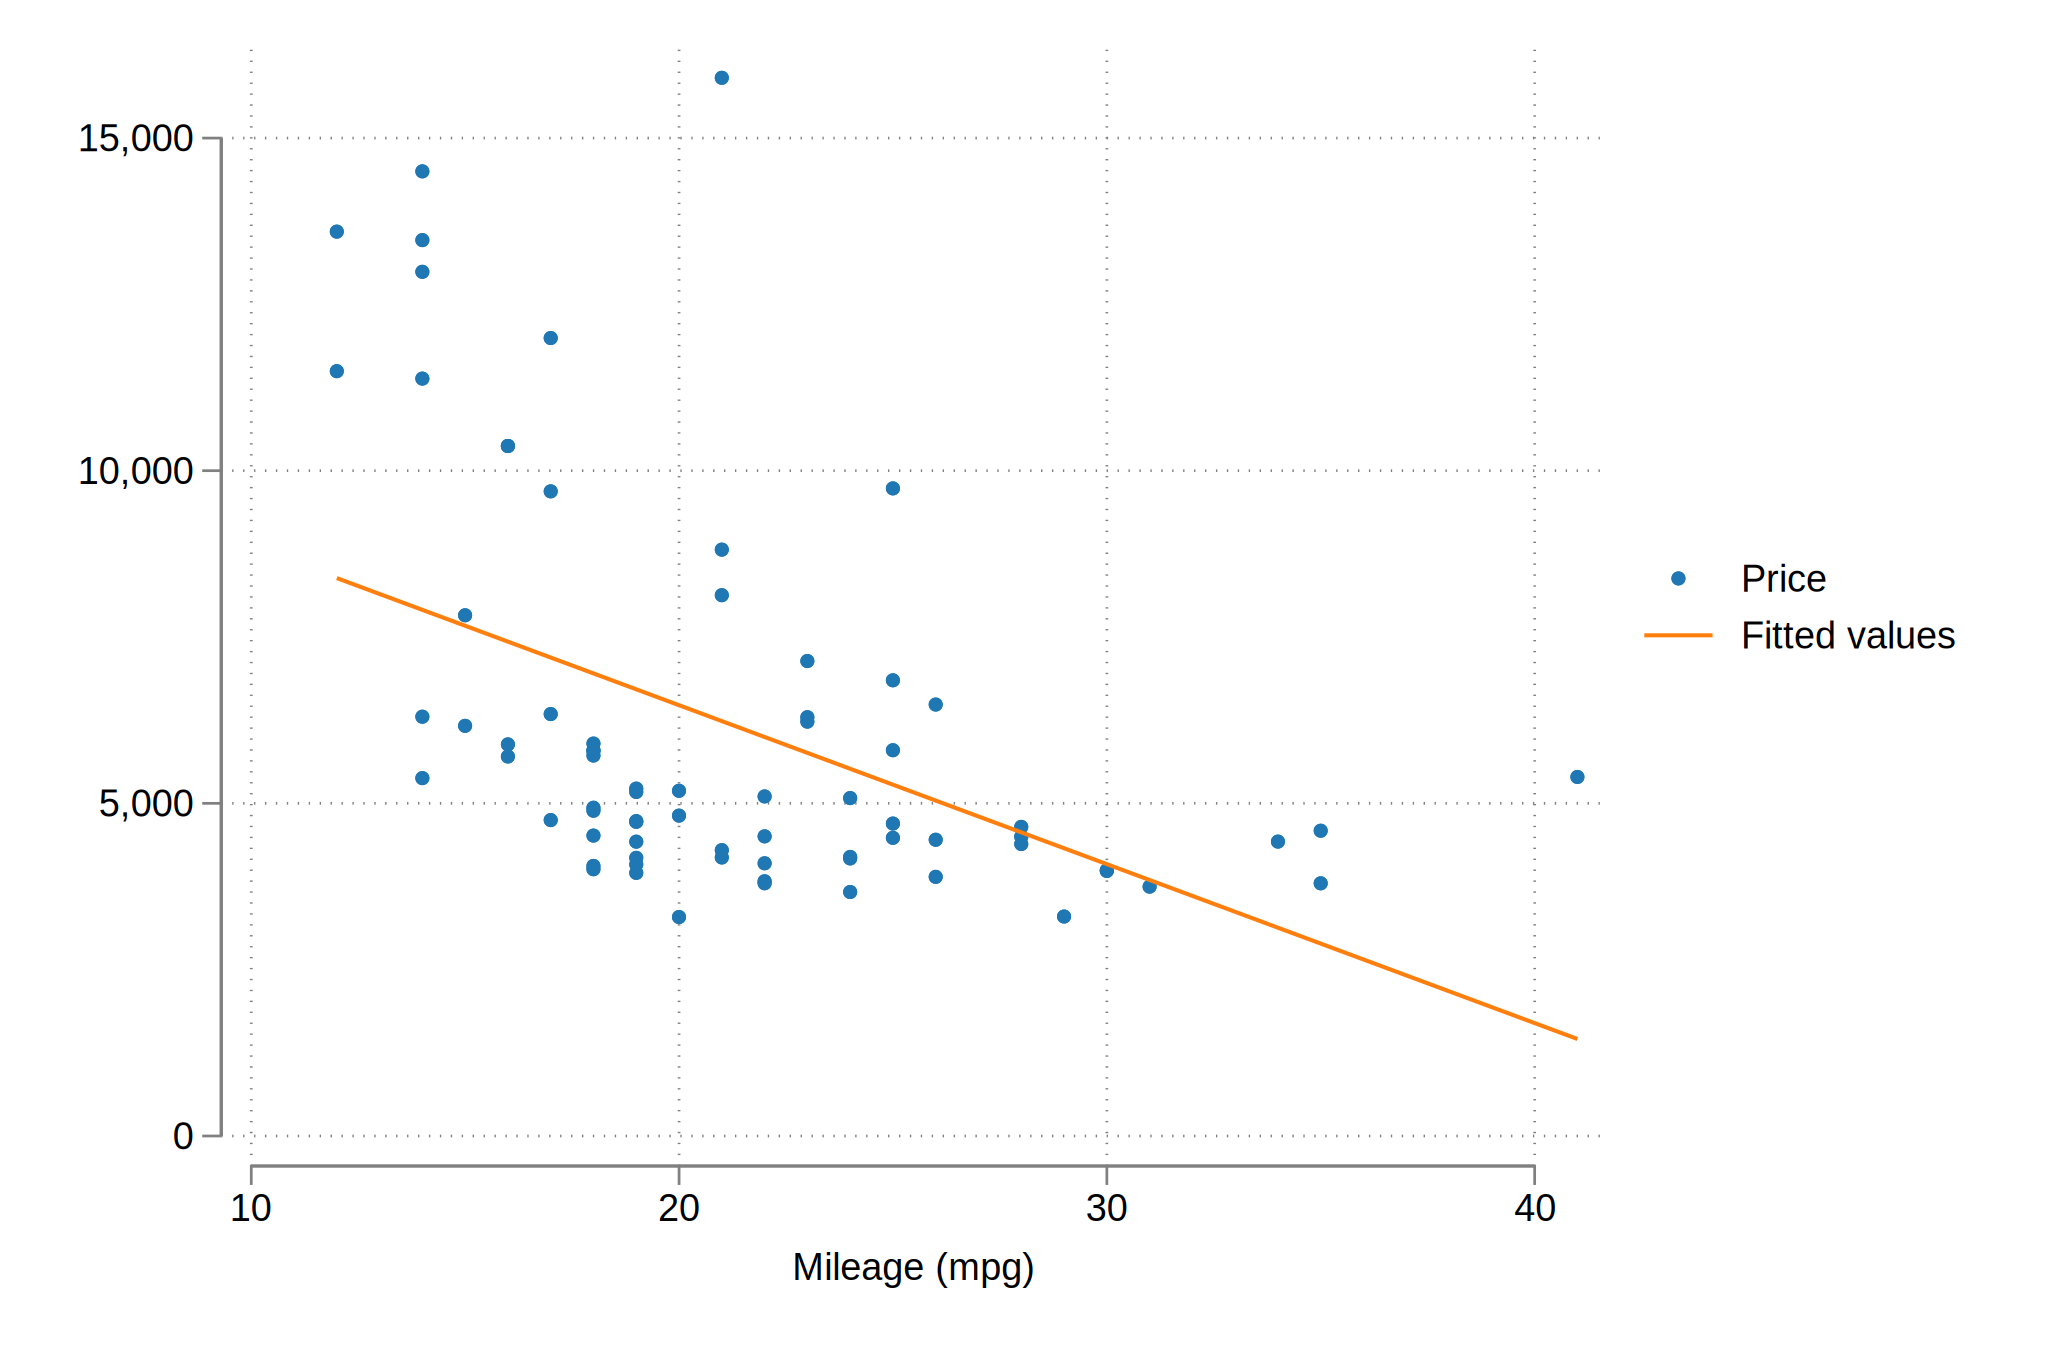

In [216]:
%%stata

graph twoway (scatter price mpg) (lfit price mpg)


. 
. hist price, freq
(bin=8, start=3291, width=1576.875)

. 


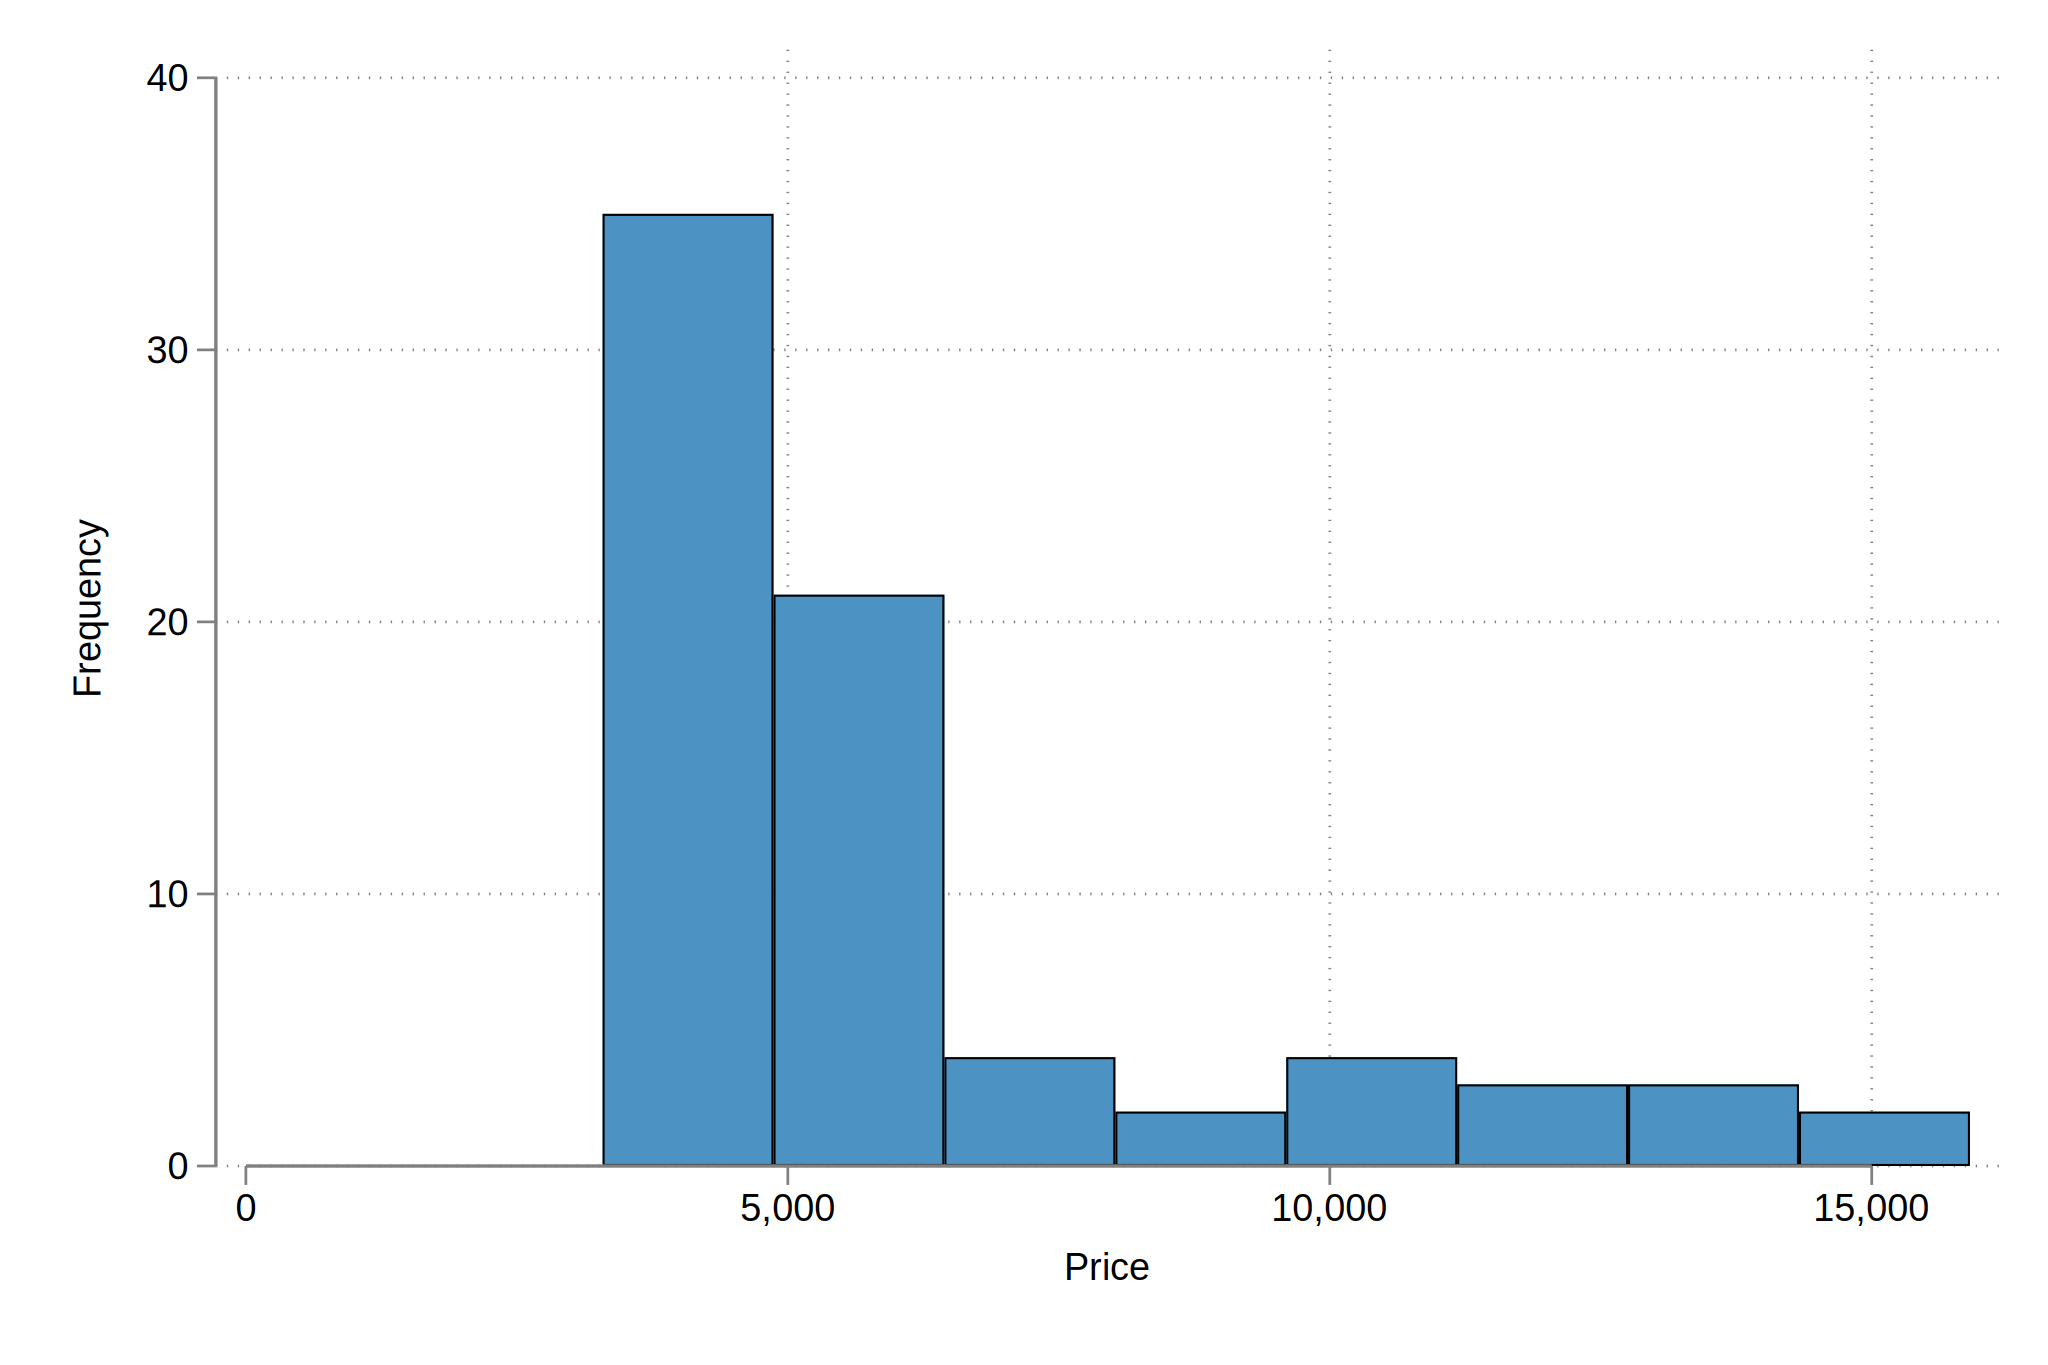

In [217]:
%%stata

hist price, freq


. 
. graph box price

. 


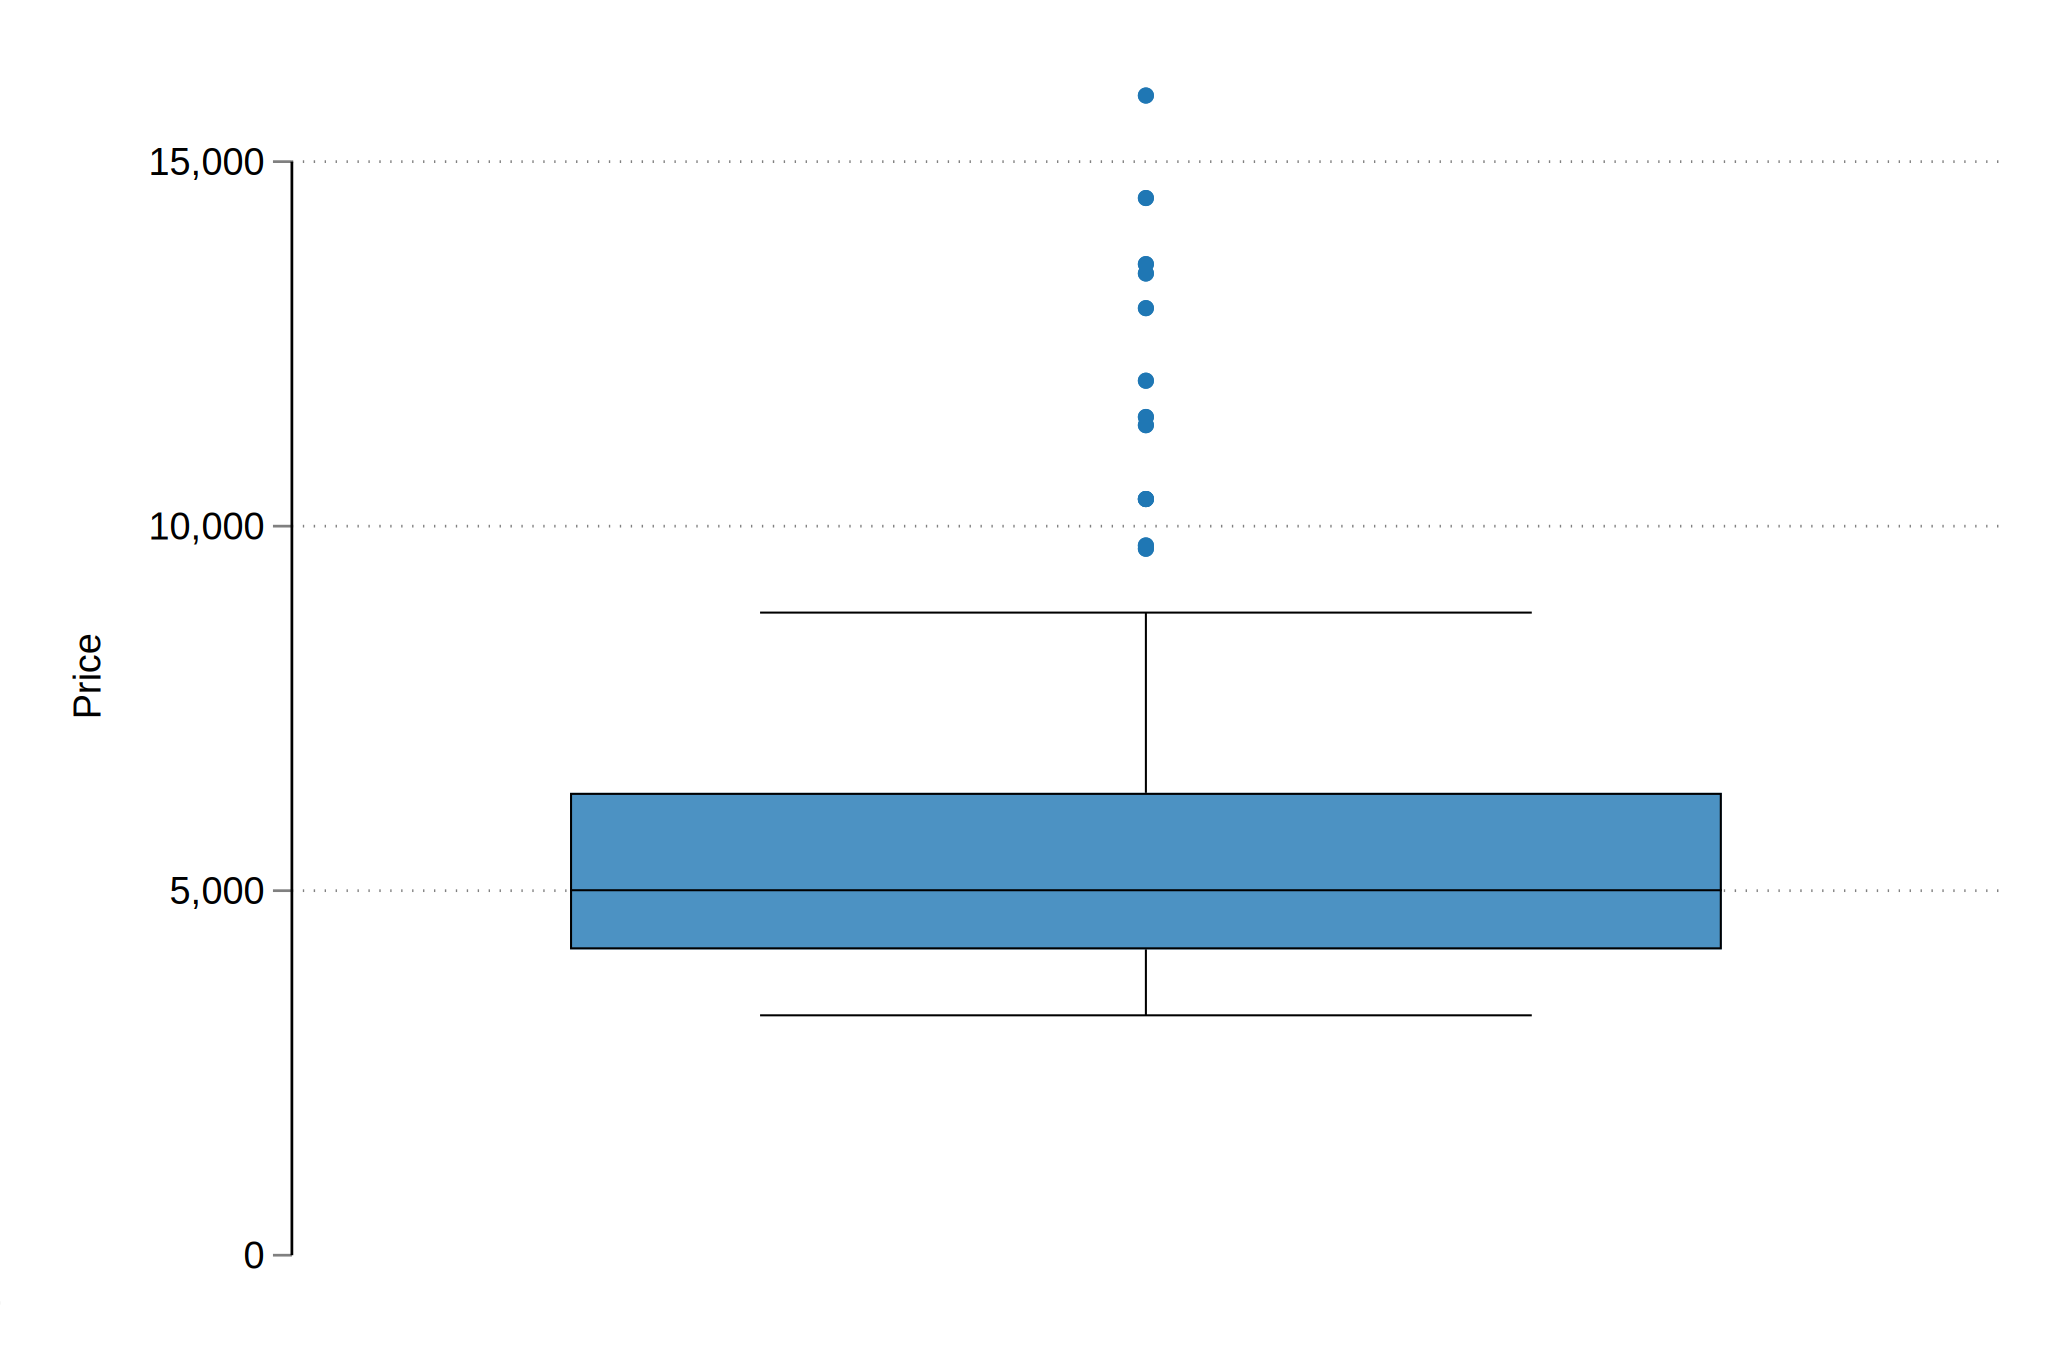

In [218]:
%%stata

graph box price



. 
. graph bar price, by(foreign)

. 


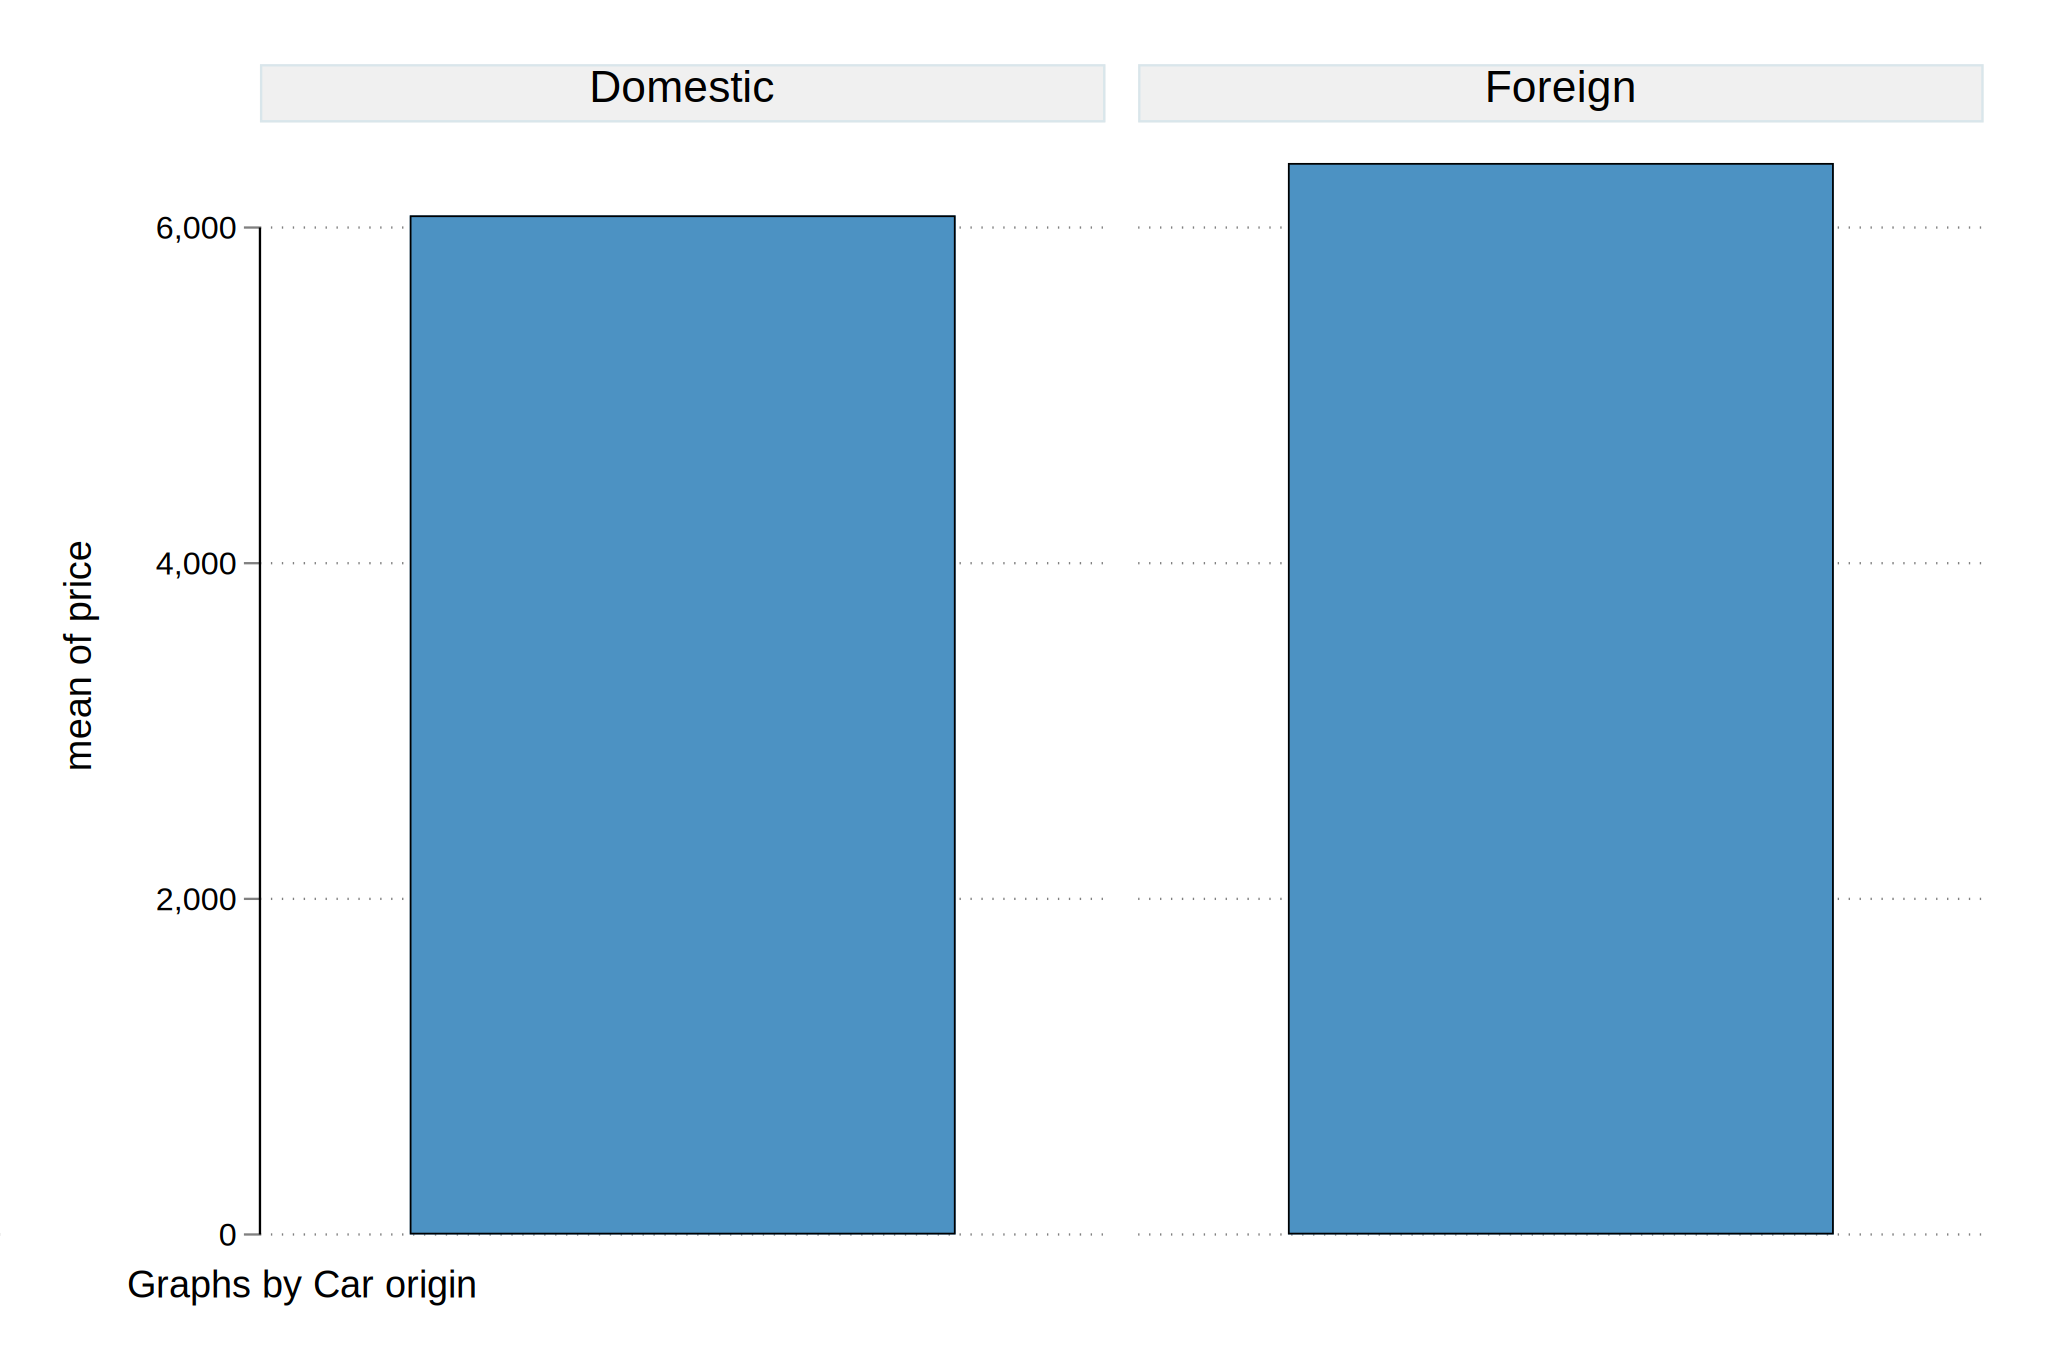

In [219]:
%%stata

graph bar price, by(foreign)